# Лабораторная работа 6: Методы оптимизации в машинном обучении

## Выполнила: Иванова Елизавета Дмитриевна, НПМбд-01-19

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import oracles
import optimization
import presubmit_tests
from plot_trajectory_2d import plot_levels, plot_trajectory
from sklearn.datasets import load_svmlight_file

## Формулировка задания

✅ Скачайте коды, прилагаемые к заданию: https://github.com/arodomanov/cmc-mipt17-opt-course/tree/master/task1.

*Эти файлы содержат прототипы функций, которые Вам нужно будет реализовать. Некоторые процедуры уже частично или полностью реализованы.*


✅ Реализовать метод градиентного спуска (функция gradient_descent в модуле optimization) и процедуру линейного поиска (метод line_search в классе LineSearchTool в модуле optimization).

*Рекомендация: Для поиска точки, удовлетворяющей сильным условиям Вульфа, воспользуйтесь библиотечной функцией scalar_search_wolfe2 из модуля scipy.optimize.linesearch. Однако следует иметь в виду, что у этой библиотечной функции имеется один недостаток: она иногда не сходится и возвращает значение None. Если библиотечный метод вернул None, то запустите процедуру дробления шага (бэктрекинг) для поиска точки, удовлетворяющей условию Армихо.*

см. **optimization.py**

✅ Получить формулы для градиента и гессиана функции логистической регрессии. Выписать их в отчет в матрично-векторной форме$^2$ с использованием поэлементных функций, но без каких-либо суммирований. Также выписать в отчет выражение для самой функции логистической регрессии в матричновекторной форме (без явных суммирований).

*$ ^2 $ В матрично-вектрной форме допускается использование операций матричного сложения/произведения, умножения на скаляр, транспонирования, стандартного скалярного произведения, поэлементного произведения (произведение Адамара; символ $ \odot $), а также применения ко всем элементам вектора некоторой скалярной функции. Кроме этого, допускается использование стандартных матриц/векторов (заданного размера): единичная матрица $ I_n $, нулевая матрица $ 0_{m×n} $, нулевой вектор $ 0_n $, вектор из всех единиц $ 1_n := (1, . . . , 1)$.*

см. **oracles.py**

✅ Реализовать оракул логистической регрессии (класс LogRegL2Oracle в модуле oracles). Также доделать реализацию вспомогательной функции create_log_reg_oracle в модуле oracles.

*Замечание: Реализация оракула должна быть полностью векторизованной, т. е. код не должен содержать никаких циклов.
Замечание: Ваш код должен поддерживать как плотные матрицы A типа np.array, так и разреженные типа scipy.sparse.csr_matrix.
Замечание: Нигде в промежуточных вычислениях не стоит вычислять значение exp(−bihai
, xi), иначе может произойти переполнение. Вместо этого следует напрямую вычислять необходимые величины с
помощью специализированных для этого функций: np.logaddexp для ln(1+exp(·)) и scipy.special.expit
для 1/(1 + exp(·)).*

см. **oracles.py**

✅ Реализовать подсчет разностных производных (функции grad_finite_diff и hess_finite_diff в модуле oracles). Проверить правильность реализации подсчета градиента и гессиана логистического оракула с помощью реализованных функций. 

см. **oracles.py**

Для этого сгенерируйте небольшую модельную выборку (матрицу A и вектор b) и сравните значения, выдаваемые методами grad и hess, с соответствующими разностными аппроксимациями в нескольких пробных точках x.

In [2]:
A = np.array([[1, 2], [-3, 4], [5, -6]])
b = np.array([1, 1, -1])
x0 = np.array([[1, 2], [-1, 3], [4, -2]])
regcoef = 2
oracle = oracles.create_log_reg_oracle(A, b, regcoef)
f = lambda x: oracle.func(x)

In [3]:
for x in x0: 
    print('\nx =', x)
    print('\nГрадиент аналитически (grad):\n', oracle.grad(x))
    print('\nГрадиент численно (grad_finite_diff):\n',oracles.grad_finite_diff(f, x))
    print('\nГессиан аналитически (hess):\n', oracle.hess(x))
    print('\nГессиан численно (hess_finite_diff):\n', oracles.hess_finite_diff(f, x))


x = [1 2]

Градиент аналитически (grad):
 [2.00598032 3.9847922 ]

Градиент численно (grad_finite_diff):
 [2.00598027 3.98479196]

Гессиан аналитически (hess):
 [[ 2.02974537 -0.0312624 ]
 [-0.0312624   2.05524303]]

Гессиан численно (hess_finite_diff):
 [[ 2.02976302 -0.031255  ]
 [-0.031255    2.05523598]]

x = [-1  3]

Градиент аналитически (grad):
 [-2.00223064  5.99553769]

Градиент численно (grad_finite_diff):
 [-2.00223091  5.99553758]

Гессиан аналитически (hess):
 [[2.00221694 0.00443081]
 [0.00443081 2.00886571]]

Гессиан численно (hess_finite_diff):
 [[2.00216732 0.00442313]
 [0.00442313 2.00888195]]

x = [ 4 -2]

Градиент аналитически (grad):
 [10.5        -7.66666666]

Градиент численно (grad_finite_diff):
 [10.4999998  -7.66666801]

Гессиан аналитически (hess):
 [[2.08333334 0.16666666]
 [0.16666666 2.33333334]]

Гессиан численно (hess_finite_diff):
 [[2.08345341 0.16676438]
 [0.16676438 2.33342234]]


Значения почти совпадают.

✅ Реализовать метод Ньютона (функция newton в модуле optimization).

*Замечание: Для поиска направления в методе Ньютона не нужно в явном виде обращать гессиан (с помощью функции np.linalg.inv) или использовать самый общий метод для решения системы линейных уравнений (numpy.linalg.solve). Вместо этого следует учесть тот факт, что в рассматриваемой задаче гессиан является симметричной положительно определенной матрицей и воспользоваться разложением Холецкого (функции scipy.linalg.cho_factor и scipy.linalg.cho_solve).*

см. **optimization.py**

✅ Tесты в файле presubmit_tests.py проходят успешно:

In [4]:
presubmit_tests.test_python3()
presubmit_tests.test_QuadraticOracle()
presubmit_tests.test_log_reg_usual()
presubmit_tests.test_log_reg_oracle_calls()
presubmit_tests.test_grad_finite_diff_1()
presubmit_tests.test_grad_finite_diff_2()
presubmit_tests.test_hess_finite_diff_1()
presubmit_tests.test_hess_finite_diff_2()
presubmit_tests.test_line_search()
presubmit_tests.test_gd_basic()
presubmit_tests.test_newton_basic()
presubmit_tests.test_newton_1d()
presubmit_tests.test_newton_fail()

Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]


✅ Провести эксперименты.

## 1. Эксперимент: Траектория градиентного спуска на квадратичной функции

Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: придумайте две-три квадратичные двумерные функции, на которых работа метода будет отличаться, нарисуйте графики с линиями уровня функций и траекториями методов.

Для рисования линий уровня можете воспользоваться функцией plot_levels, а для рисования траекторий — plot_trajectory из файла plot_trajectory_2d.py, прилагающегося к заданию.

Также обратите внимание, что оракул квадратичной функции QuadraticOracle уже реализован в модуле oracles. Он реализует функцию 

$ f(x) = \frac{1}{2}\langle Ax, x \rangle - \langle b, x \rangle  $, где $ A \in \mathbb{S}_{++}^n, b \in \mathbb{R}^n $.

$f(x) = \frac{1}{2} x^TAx - b^Tx$

In [6]:
def draw_plot(A, b, x0, methods, xrange, yrange):
    
    oracle = oracles.QuadraticOracle(A, b)
    print('Число обусловленности:', np.linalg.norm(A) * np.linalg.norm(np.linalg.inv(A)))
    
    for i in range(len(methods)):
        fig, ax = plt.subplots(1, len(x0), figsize = (21, 6))
        fig.suptitle(str(methods[i]), fontsize=18)
        plt.subplots_adjust(top=0.8)
            
        for j in range(len(x0)):
            
            [x_star, msg, history] = optimization.gradient_descent(oracle, x0[j], line_search_options = methods[i], trace=True)
            plot_levels(oracle.func, ax[j], xrange=xrange, yrange=yrange)
            plot_trajectory(oracle.func, history['x'], ax[j])
            
            ax[j].set_title('$x_0$ = ' + str(x0[j]) + '\nКоличетво итераций = ' + str(len(history['x'])), fontsize=16)

In [7]:
methods = [{'method': 'Constant', 'c': 0.1},
           {'method': 'Armijo', 'alpha_0': 10.0, 'c1':0.5},
           {'method': 'Wolfe', 'c1':1e-4, 'c2':0.5, 'alpha_0':1.0}]

x0 = np.array([[-4, 4], [4, -4], [4, 4]])

$A = \begin{pmatrix}
                5 & -1\\
                -1 & 4
                \end{pmatrix},
        b = \begin{pmatrix}
                0\\
                0
                \end{pmatrix},
        x_0 = (-4, 4), (4, -4), (4, 4)$

Число обусловленности: 2.263157894736842


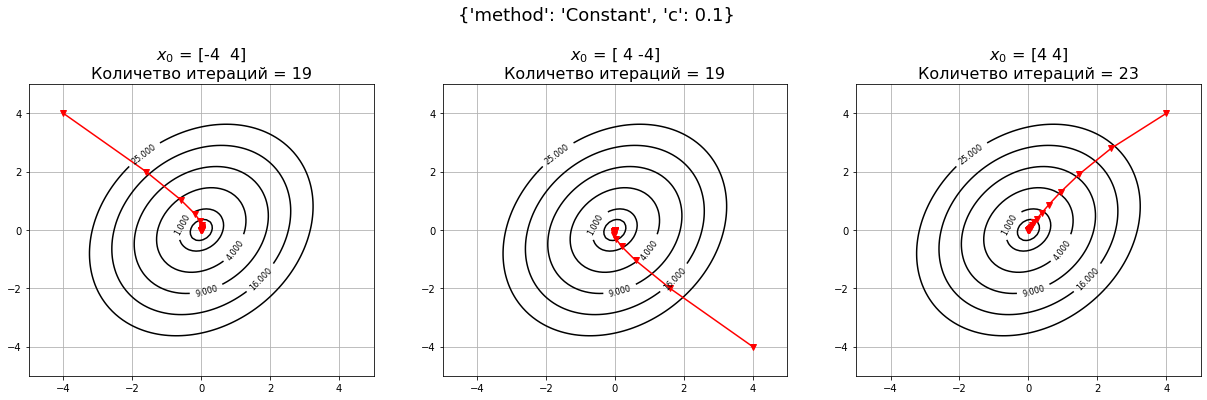

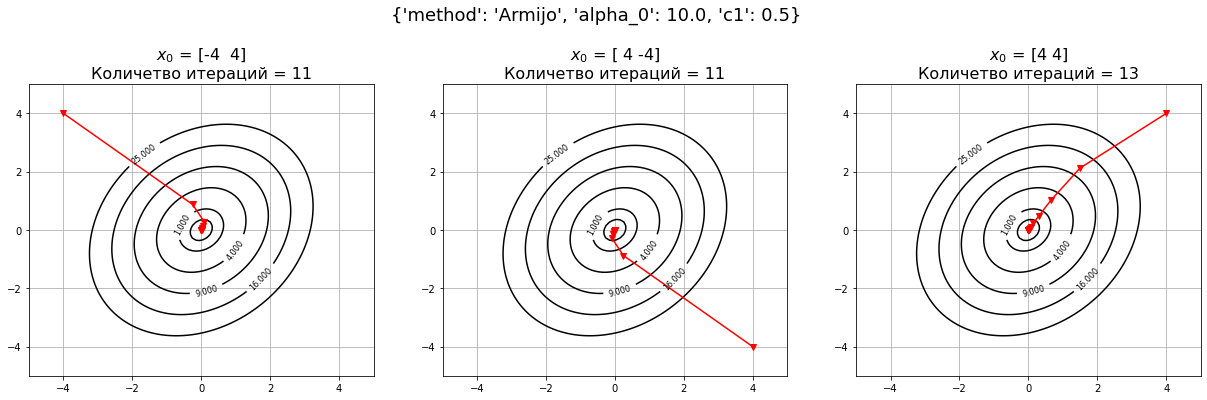

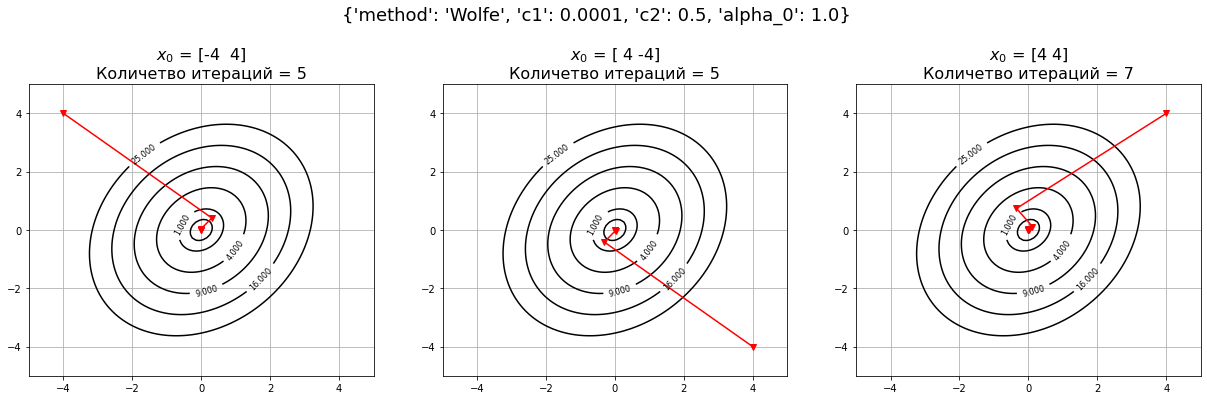

In [8]:
A = np.array([[5, -1], [-1, 4]])
b = np.array([0, 0])
xrange, yrange = [-5, 5], [-5, 5]
draw_plot(A, b, x0, methods, xrange, yrange)

$A = \begin{pmatrix}
                1 & -1\\
                -1 & 2
                \end{pmatrix},
        b = \begin{pmatrix}
                3\\
                3
                \end{pmatrix},
        x_0 = (-4, 4), (4, -4), (4, 4)$

Число обусловленности: 7.000000000000001


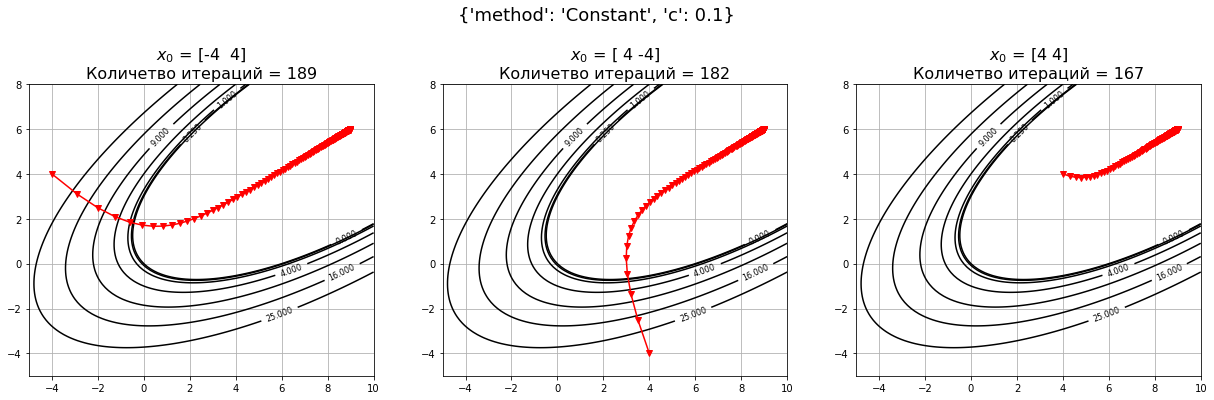

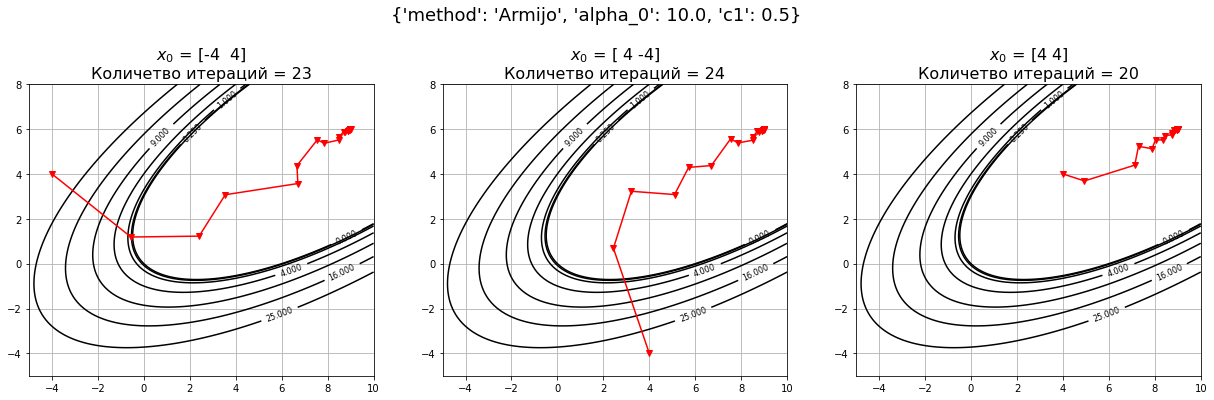

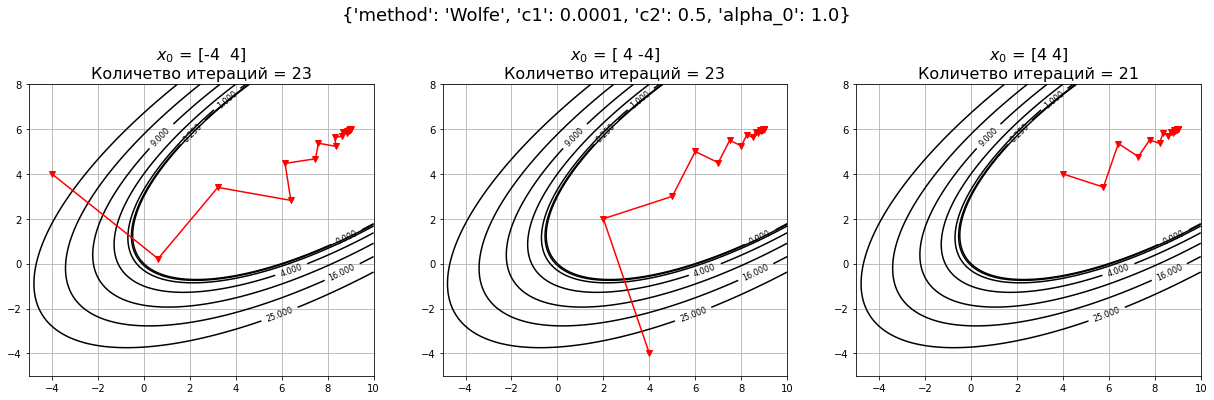

In [9]:
A = np.array([[1, -1], [-1, 2]])
b = np.array([3, 3])
xrange, yrange = [-5, 10], [-5, 8]
draw_plot(A, b, x0, methods, xrange, yrange)

$A = \begin{pmatrix}
                3 & 2\\
                2 & 1
                \end{pmatrix},
    b = \begin{pmatrix}
            0\\
            0
            \end{pmatrix},
    x_0 = (-4, 4), (4, -4), (4, 4)$

Число обусловленности: 18.0


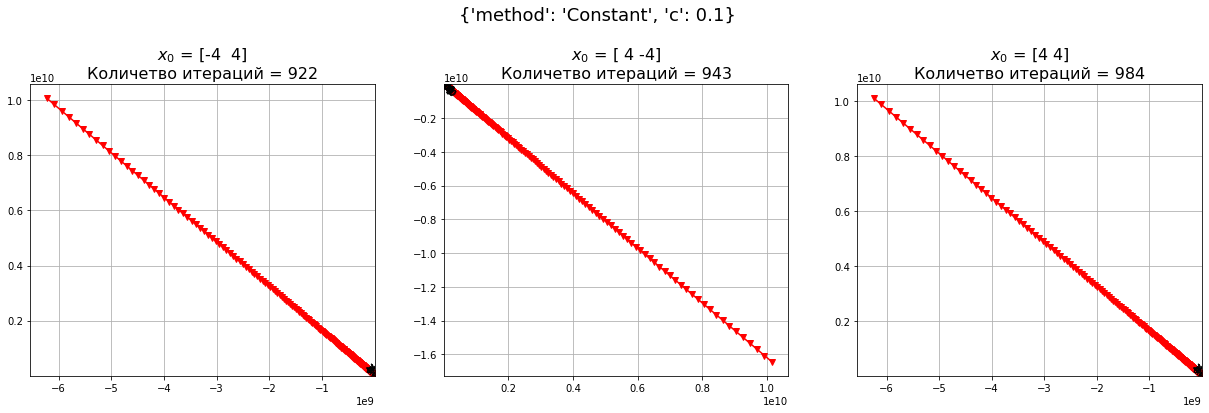

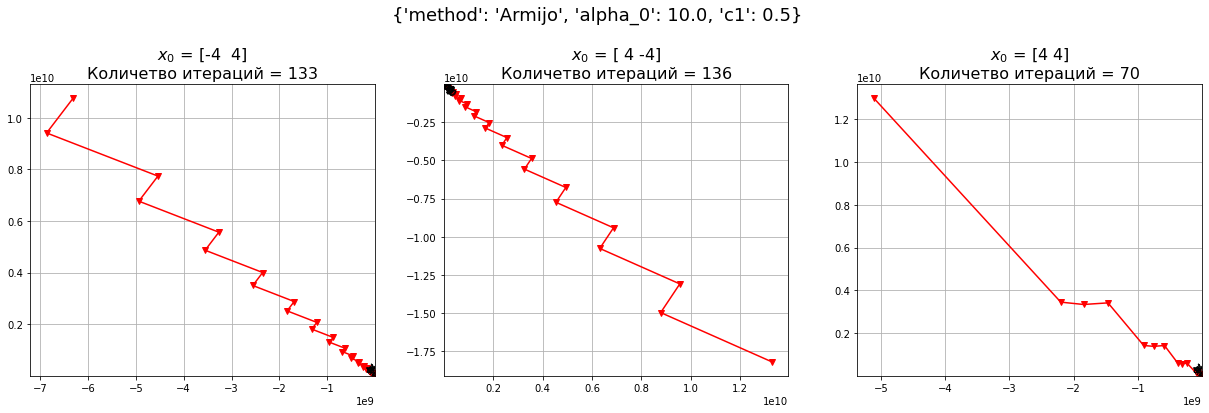

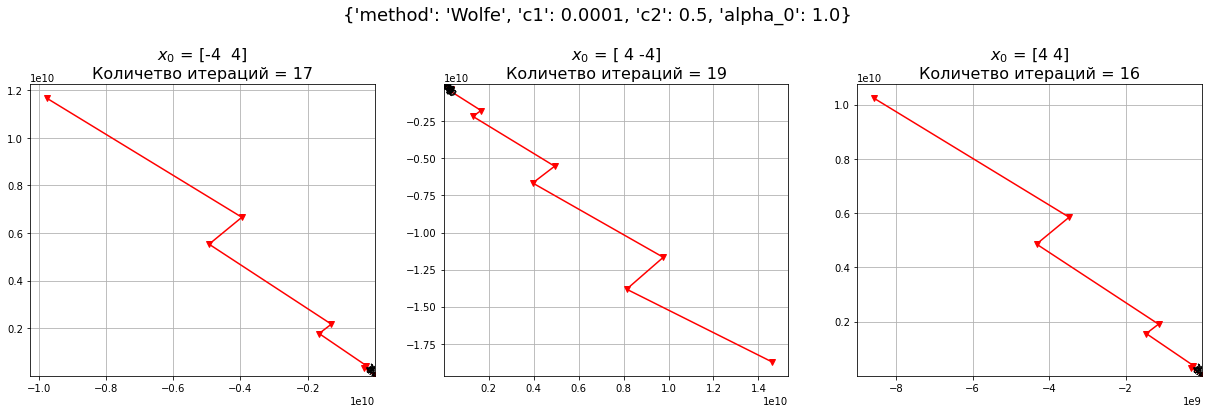

In [11]:
A = np.array([[3, 2], [2, 1]])
b = np.array([0, 0])
xrange, yrange = [-5, 5], [-5, 5]
draw_plot(A, b, x0, methods, xrange, yrange)

Как отличается поведение метода в зависимости от:
1. числа обусловленности функции
2. выбора начальной точки
3. стратегии выбора шага (константная стратегия, Армихо, Вульф)?

**Ответ:**

*1. Чем больше число обуловленности, тем большее количество итераций требуется всем методам для спуска (увеличивается количество зигзагов).*

*2. Выбор начальной точки влияет только на количество итераций: чем ближе точка к минимуму, тем меньше итераций.*

*3. Стратегия выбора шага влияет на скороть спуска, на количество итераций: при константной стратегии требуется больше всего итераций, а при оптимизационном выборе (Вульф) – меньше всего.*

## 2. Эксперимент: Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

Исследуйте, как зависит число итераций, необходимое градиентному спуску для сходимости, от следующих двух параметров: 

1) числа обусловленности k ≥ 1 оптимизируемой функции

2) размерности пространства n оптимизируемых переменных.


Для этого для заданных параметров $n$ и $k$ сгенерируйте случайным образом квадратичную задачу размера $n$ с числом обусловленности $k$ и запустите на ней градиентный спуск с некоторой фиксированной требуемой точностью. Замерьте число итераций $T(n, k)$, которое потребовалось сделать методу до сходимости (успешному выходу по критерию остановки).

**Рекомендация:** *Проще всего сгенерировать случайную квадратичную задачу размера $n$ с заданным числом обусловленности $k$ следующим образом. В качестве матрицы $ A \in \mathbb{S}_{++}^n$ удобно взять просто диагональную матрицу $A = Diag(a)$, у которой диагональные элементы сгенерированы случайно
в пределах $[1, k]$, причем $min(a) = 1$, $max(a) = k$. В качестве вектора $b \in \mathbb{R}^n $ можно взять вектор со случайными элементами. Диагональные матрицы удобно рассматривать, поскольку с ними можно эффективно работать даже при больших значениях $n$. Рекомендуется хранить матрицу $A$ в формате разреженной диагональной матрицы (см. scipy.sparse.diags).*

Зафиксируйте некоторое значение размерности $n$. Переберите различные числа обусловленности $k$ по сетке и постройте график зависимости $T(κ, n)$ против $k$. Поскольку каждый раз квадратичная задача генерируется случайным образом, то повторите этот эксперимент несколько раз. В результате для фиксированного значения $n$ у Вас должно получиться целое семейство кривых зависимости $T(κ, n)$ от $k$. Нарисуйте все эти кривые одним и тем же цветом для наглядности (например, красным).

Теперь увеличьте значение n и повторите эксперимент снова. Вы должны получить новое семейство кривых $T(n', κ)$ против $k$. Нарисуйте их все одним и тем же цветом, но отличным от предыдущего (например, синим). Повторите эту процедуру несколько раз для других значений $n$. В итоге должно получиться несколько разных семейств кривых — часть красных (соответствующих одному значению $n$), часть синих (соответствующих другому значению $n$), часть зеленых и т. д.

Обратите внимание, что значения размерности $n$ имеет смысл перебирать по логарифмической сетке (например, $n = 10$, $n = 100$, $n = 1000$ и т. д.).

In [15]:
K  = np.linspace(1, 100, 10)
methods = [{'method': 'Constant', 'c': 0.1},
           {'method': 'Armijo', 'alpha_0': 10.0, 'c1':0.5},
           {'method': 'Wolfe', 'c1':1e-4, 'c2':0.5, 'alpha_0':1.0}]
options = [(10, 'Aqua', 'n = 10'), (100, 'SpringGreen', 'n = 100'), (1000, 'Yellow', 'n = 1000'),
           (10000, 'HotPink', 'n = 10000')]

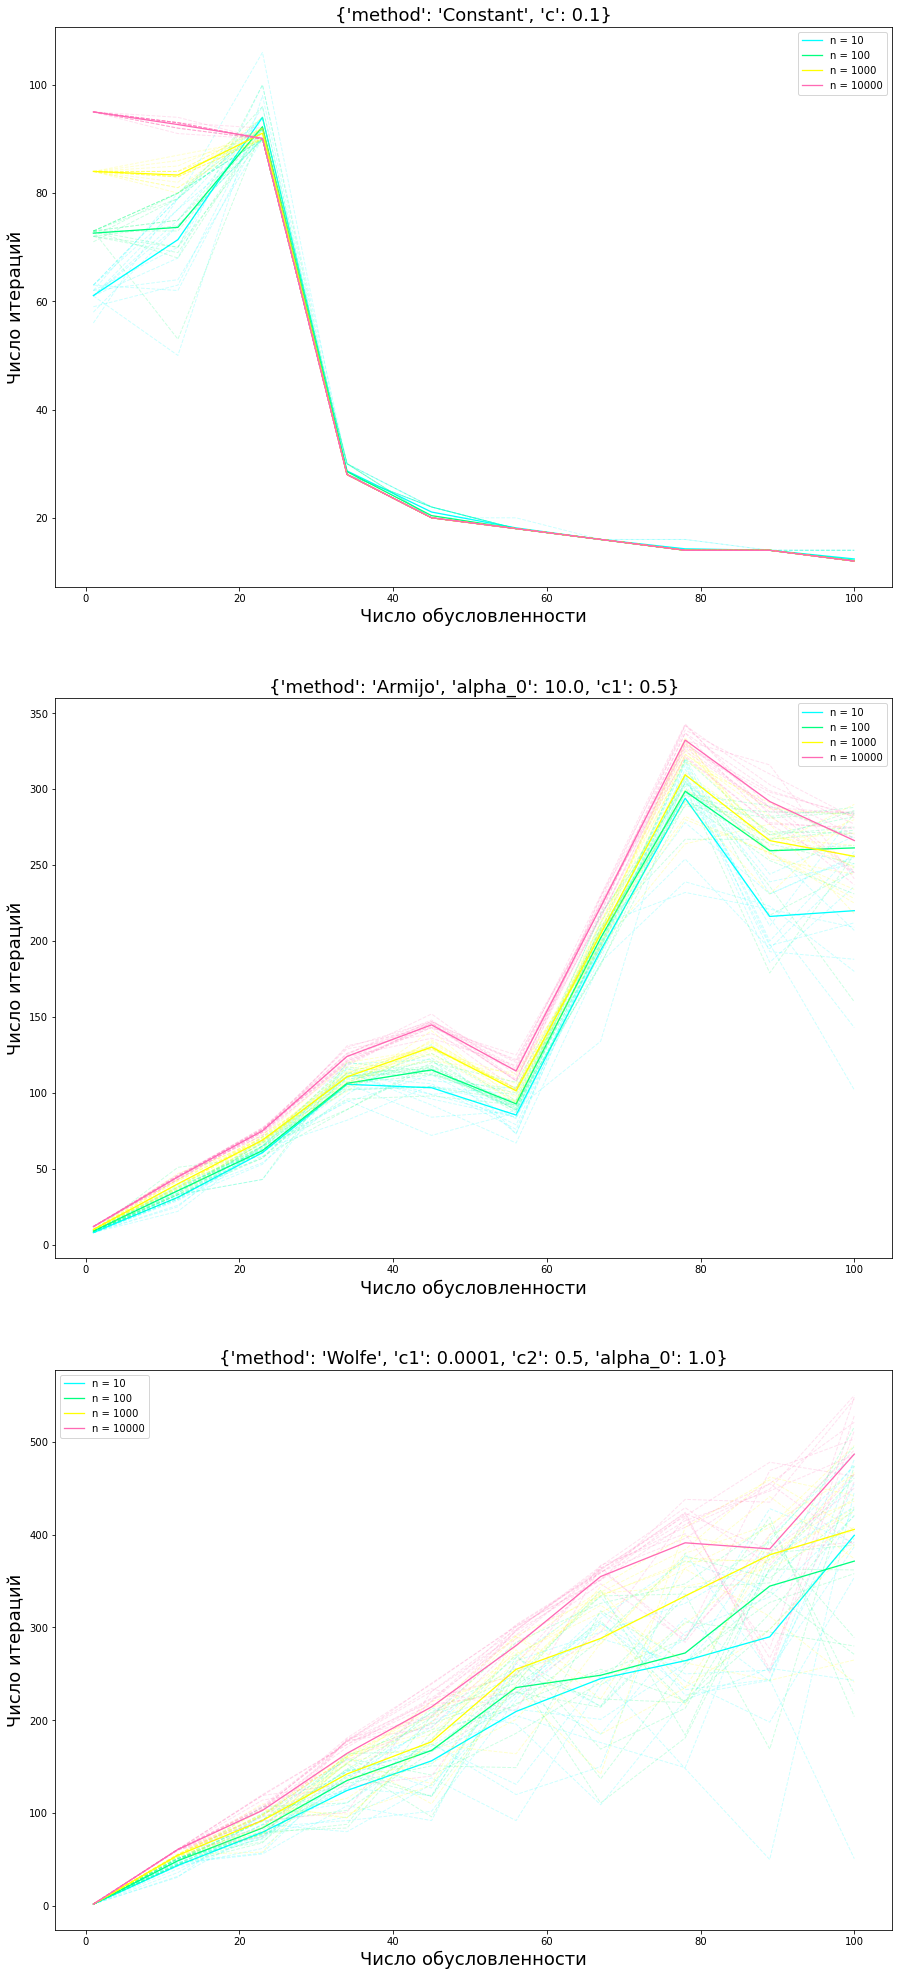

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(15,35))

for method in range(len(methods)):
    for option in options:
        T = np.zeros(len(K))
        for i in range(15):
            iterations = []
            
            for k in K:
                a = np.random.uniform(1, k, option[0])
                a[0], a[-1] = 1, k
                A, b = scipy.sparse.diags(a), np.random.rand(option[0]) * k
                oracle = oracles.QuadraticOracle(A, b)
                x_star, msg, history = optimization.gradient_descent(oracle, np.zeros(option[0]), 
                                                                     line_search_options = methods[method], trace=True)
                iterations.append(len(history['grad_norm']))
                
            T = T + np.array(iterations)
            ax[method].plot(K, iterations, '--', color=option[1], linewidth=1, alpha=0.2)
        
        ax[method].plot(K, T/15, color=option[1], label = option[2], linewidth=1.3)
        ax[method].set_title(str(methods[method]), fontsize = 18)
        ax[method].set_xlabel('Число обусловленности', fontsize = 18)
        ax[method].set_ylabel('Число итераций', fontsize = 18)
        ax[method].legend()
        ax[method].grid(color='gainsboro')

Какие **выводы** можно сделать из полученной картинки?

* *C увеличением числа обусловленности уменьшается число итераций для метода Constant*
* *C увеличением числа обусловленности растет число итераций для методов Armijo и Wolfe*
* *Размерность пространства не существенно влияет на количество итераций*

## 3. Эксперимент: Сравнение методов градиентного спуска и Ньютона на реальной задаче логистической регрессии

Сравнить методы градиентного спуска и Ньютона на задаче обучения логистической регрессии на реальных данных.

В качестве реальных данных используйте следующие три набора с сайта LIBSVM: *w8a, gisette* и *real-sim*. Коэффициент регуляризации взять стандартным образом: $λ = \frac {1}{m}$. Параметры обоих методов взять равными параметрам по умолчанию. Начальную точку выбрать $x_0 = 0$.

Построить графики сходимости следующих двух видов:

(a) Зависимость значения функции от реального времени работы метода.

(b) Зависимость относительного квадрата нормы градиента $ \frac{\parallel \nabla f(x_k) \parallel _2^2}{\parallel \nabla f(x_0) \parallel _2^2} $ (в логарифмической шкале) против реального времени работы.

При этом оба метода (градиентный спуск и Ньютон) нужно рисовать на одном и том же графике.

**Рекомендация:** *Любой набор данных с сайта LIBSVM представляет из себя текстовый файл в формате svmlight. Чтобы считать такой текстовый файл, можно использовать функцию load_svmlight_file из модуля sklearn.datasets. Обратите внимание, что эта функция возвращает матрицу в формате scipy.sparse.csr_matrix, поэтому Ваша реализация логистического оракула должна поддерживать
такие матрицы.*

In [33]:
def Comparison_of_gradient_descent_and_Newton_methods(svm_file):
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    A, b = load_svmlight_file(svm_file)
    lambda_ = 1 / len(b)
    oracle = oracles.create_log_reg_oracle(A, b, lambda_)
    
    _, _, history_gd = optimization.gradient_descent(oracle, np.zeros(A.shape[1]), trace=True)
    _, _, history_n = optimization.newton(oracle, np.zeros(A.shape[1]), trace=True)
    
    ax[0].plot(history_gd['time'], history_gd['func'], label='Градиентный спуск', color='DeepPink')
    ax[0].plot(history_n['time'], history_n['func'], label='Метод Ньютона', color='Aqua')
    ax[0].set_xlabel('Реальное время работы метода', fontsize = 18)
    ax[0].set_ylabel('Значение функции', fontsize = 18)
    ax[0].set_title('\n' + svm_file[7:] + '\n', fontsize = 20)
    ax[0].legend(fontsize = 16)
    ax[0].grid(color='gainsboro')

    ax[1].plot(history_gd['time'], np.array(history_gd['grad_norm']) ** 2 / history_gd['grad_norm'][0] ** 2, 
               label='Градиентный спуск', color='DeepPink')
    ax[1].plot(history_n['time'], np.array(history_n['grad_norm']) ** 2 / history_n['grad_norm'][0] ** 2,
               label='Метод Ньютона', color='Aqua')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('Реальное время работы метода', fontsize = 18)
    ax[1].set_ylabel('Относительный квадрат нормы градиента', fontsize = 14)
    ax[1].set_title('\n' + svm_file[7:] + '\n', fontsize = 20)
    ax[1].legend(fontsize = 16)
    ax[1].grid(color='gainsboro')

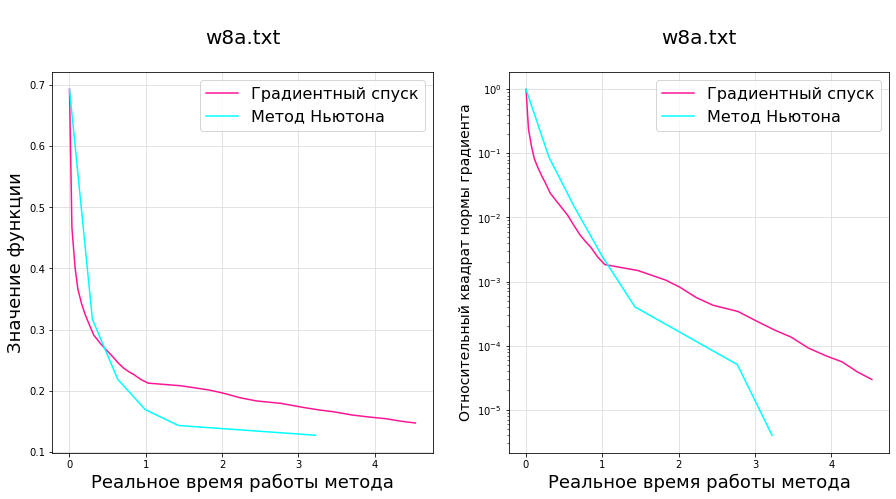

In [34]:
Comparison_of_gradient_descent_and_Newton_methods('данные/w8a.txt')

C:\Users\iveel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


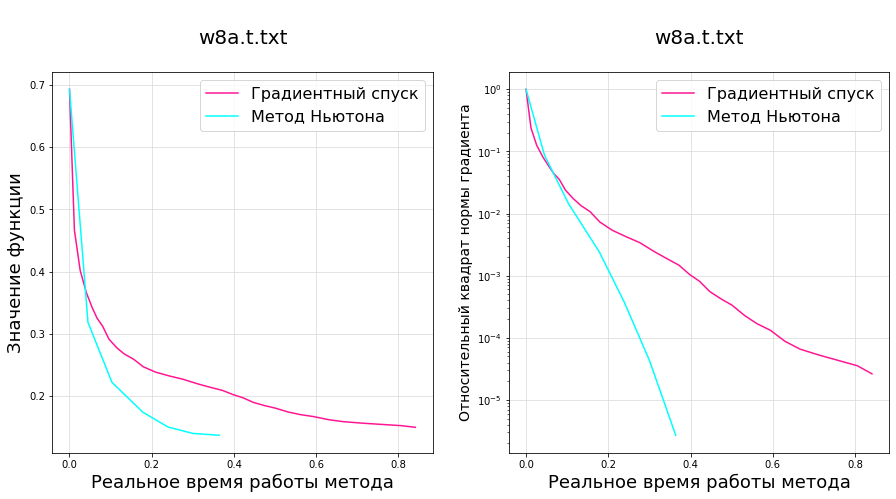

In [36]:
Comparison_of_gradient_descent_and_Newton_methods('данные/w8a.t.txt')

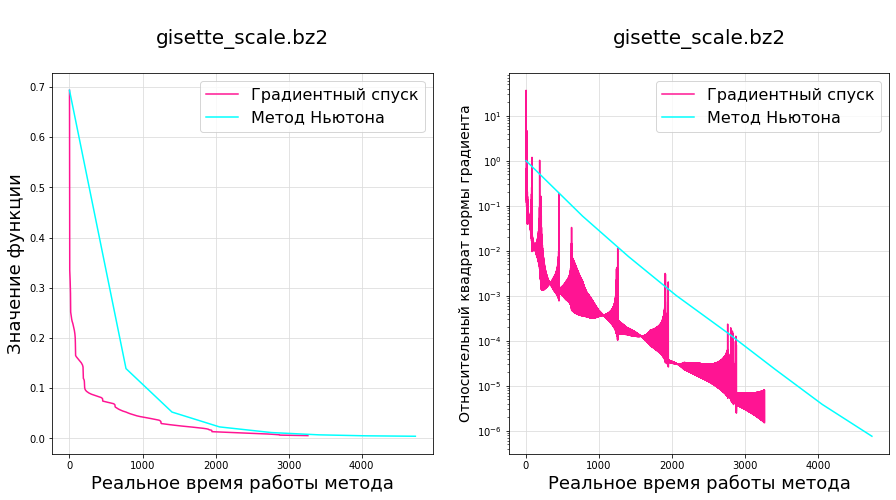

In [41]:
Comparison_of_gradient_descent_and_Newton_methods('данные/gisette_scale.bz2')

C:\Users\iveel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


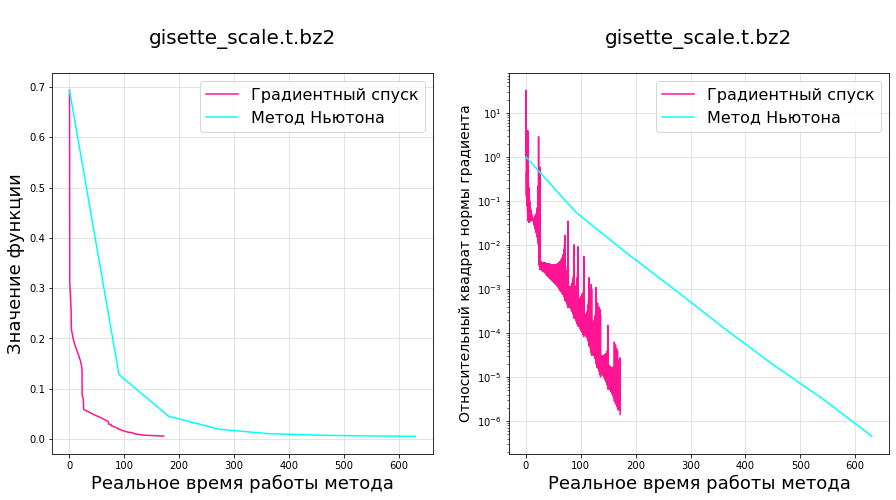

In [42]:
Comparison_of_gradient_descent_and_Newton_methods('данные/gisette_scale.t.bz2')

In [ ]:
# Comparison_of_gradient_descent_and_Newton_methods('данные/real-sim.bz2')
# мой компьютер умер :)

Какие выводы можно сделать по результатам этого эксперимента? Какой из методов лучше и в каких ситуациях?

* **w8a:** *оба метода быстрее сходятся для небольшой заданной точности (в начале) и медленнее для большой (в конце). Метод Ньютона сходится быстрее.*
* **gisette:** *скачкообразный график градиентного спуска для зависимости относительного квадрата нормы градиента против реального времени работы. Метод градиентного спуска сходится быстрее.*